# One-Hot Encoding Usage Example

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from error_metrics import *

# Read in data
df = pd.read_csv('./data/election-2000.csv')
df.head()

,State,Bush%,Age65%,Urban%,ColGrad%,Union%,Region
0,AL,56.5,13.0,69.9,20.4,9.6,Seast
1,AK,58.6,5.7,41.5,28.1,21.9,West
2,AZ,51.0,13.0,88.2,24.6,6.4,West
3,AR,51.3,14.0,49.9,18.4,5.8,Seast
4,CA,41.7,10.6,96.7,27.5,16.0,West


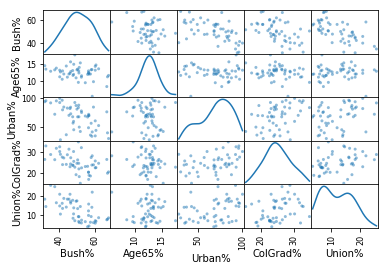

In [10]:
# Look at the raw data
pd.plotting.scatter_matrix(df, diagonal='kde')
plt.show()

In [11]:
# Get a list of the categorical features for a given dataframe. Move to util file for future use!
def cat_features(dataframe):
    td = pd.DataFrame({'a':[1,2,3], 'b':[1.0, 2.0, 3.0]})
    return filter(lambda x: not(dataframe[x].dtype in [td['a'].dtype, td['b'].dtype]), list(dataframe))

# Test the function - getcategorical columns out of df
list(cat_features(df))

['State', 'Region']

In [12]:
# Drop the State column, since it does not make sense as a predictor in this context.
del df['State']

### Perform the one-hot encoding on the data

In [13]:
df = pd.get_dummies(df, columns=['Region'])

df.head()

,Bush%,Age65%,Urban%,ColGrad%,Union%,Region_MidWest,Region_Neast,Region_Seast,Region_West
0,56.5,13.0,69.9,20.4,9.6,0,0,1,0
1,58.6,5.7,41.5,28.1,21.9,0,0,0,1
2,51.0,13.0,88.2,24.6,6.4,0,0,0,1
3,51.3,14.0,49.9,18.4,5.8,0,0,1,0
4,41.7,10.6,96.7,27.5,16.0,0,0,0,1


In [14]:
data_x = df[list(df)[1:]]
data_y = df['Bush%']
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

In [16]:
# Build model, fit on test data, and create predictions on test data.
model = linear_model.LinearRegression() # Construct model object
model.fit(x_train, y_train) # Fit the model 
preds = model.predict(x_test) # Build predictions on the test data
print_regression_error_metrics(y_test, preds)


MSE, MAE, R^2, EVS: [19.402104317099155, 3.1867130950791314, 0.69071432090440743, 0.69342824492326693]
